## <font color = red> Please fill up the asked information!
    
<font color = teal>Name: Lauri Reima

<font color = teal>Student number: 2109673

<font color = teal>Mail: loreim@utu.fi

------

# Data Analysis and Knowledge Discovery: Exercise 2, Supervised learning

The previous exercise was about <i>data understanding</i> and <i>data preparation</i>, which formed the basis for the modeling phase of the data mining process. Many modeling techniques make assumptions about the data, so the exploration and preparation phases can't be ignored. Now, as we have checked the validity of data and familiarized ourselves with it, we can move on to the next stage of the Cross-Industry Standard Process for Data Mining (CRISP-DM), which is <font color = green>modeling</font>.

The questions to be answered at this stage could include:

- What kind of model architecture best fits our data?
- How well does the model perform technically?
- Could we improve its performance?
- How do we evaluate the model's performance?

<i>Machine learning</i> is a subfield of artificial intelligence that provides automatic, objective and data-driven techniques for modeling the data. Its two main branches are <i>supervised learning</i> and <i>unsupervised learning</i>, and in this exercise, we are going to use the former, <font color = green>supervised learning</font>, for classification and regression tasks.

For classification, data remains the same as in the previous exercise, but I've already cleaned it up for you. Some data pre-processing steps are still required to ensure that it's in an appropriate format so that models can learn from it. Even though we are not conducting any major data exploration nor data preparation this time, <i>you should <b>never</b> forget it in your future data analyses</i>.

-----

<b>General guidance for exercises</b>

- Answer <b>all</b> questions below, even if you can't get your script to fully work.
- Write clear and easily readable code, and include explanations what your code does.
- Make informative illustrations: include labels for x and y axes, legends and captions for your plots.
- You can add more code and markup cells, as long as the flow of the notebook stays readable and logical.
- <b>A complete submission includes a working notebook</b>, so it's highly recommended to run "Restart & Run all" before the final save. Remember to submit BOTH versions of the exercise (ipynb AND html/pdf). 
- Grading: *Fail*/*Pass*/*Pass with honors* (+1)
    - Passing requires that <b>the parts 1-5</b> are completed.
    - +1 bonus point (grading *Pass with honors*) requires a <b>completely</b> correct solution and also thorough analysis.
- If you encounter problems, Google first. Always give the credit where it belongs so please <b>cite your sources, whether you're referencing text or code</b>. You will learn so much more when you have to research and summarize information in your own words. If you can't find an answer to the problem, don't hesitate to ask in the Moodle discussion or directly via email (tuhlei@utu.fi).
- Note! Don't leave it to the last moment! No feedback service during weekends.
- <b>We do not encourage the use of ChatGPT or similar models</b>, but if you choose to do so, always be critical of the outputs and try to comprehend them before any use. Also, make a brief description how you utilized the model (what was your input and how did you benefit from the output).


<font color = green> The guided exercise session is held on the 28th of November at 14:15-16:00, at TSE Elovena-Sali.</font>

<font color = red size = 4><b>The deadline is the 30th of November at 23:59</b></font>. Late submissions will not be accepted unless there is a valid excuse for an extension which should be asked **before** the original deadline.


------

### Gather all packages needed for this notebook here:

You can use other packages as well, but this excercise can be completed with those below.

In [1]:
import numpy as np
import pandas as pd
from numpy.random import default_rng

# Visualization packages - matplotlib and seaborn
# Remember that pandas is also handy and capable when it comes to plotting!
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning package - scikit-learn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Ridge, LinearRegression

# Show the plots inline in the notebook
%matplotlib inline

______________
## <font color = lightcoral>1. Classification using k-nearest neighbors </font> 

We start exploring the world of data modeling by using the <font color = lightcoral>K-Nearest Neightbors (k-NN) algorithm</font>. The k-NN algorithm is one of the classic supervised machine learning algorithms which assumes that similar points are close to each other. 

In our case, we'll use the k-NN algorithm to *predict the presence of cardiovascular disease* (CVD) using all the other variables as <font color = lightcoral>features</font> in the given data set. I.e. the <font color = lightcoral>target variable</font> that we are interested in is `cardio`.

But first, we need data for the task. The code for loading the data into the environment is provided for you. The code should work but make sure that you have the CSV file of the data in the same directory where you have this notebook file.

**Exercise 1 A)**

Take a random sample of 1500 rows from the dataframe using your student id as a seed. Print the first 15 rows to check that everything is ok with the dataframe.

*Note: as mentioned, the data remains the same, but cholesterol has been one-hot-encoded for you already. There's also a new variable, gluc (about glucose levels), which is one-hot-encoded for you. It has similar values as cholesterol originally had [normal, at risk, elevated].*


In [2]:
### Loading code provided
# ------------------------------------------------------
# The data file should be at the same location than the 
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------

# Path for the data
data_path = 'ex2_cardio_data.csv'

# Read the CSV file 
cardio_data = pd.read_csv(data_path)

In [3]:
### Code - Resample and print 15 rows
student_number = 2109673 
np.random.seed(student_number)

df = pd.DataFrame()
numbers = np.random.choice(6000,1500, replace=False) # false, so there are no duplicates

for num in numbers:
    df = pd.concat([df, cardio_data.iloc[[num]]])
df.head(15)

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_normal,cholesterol_elevated,cholesterol_high,gluc_normal,gluc_elevated,gluc_high
98,57,1,154,70.0,120,60,0,0,1,0,1,0,0,1,0,0
127,56,1,159,64.0,120,80,0,0,1,0,0,0,1,0,0,1
559,55,1,149,60.0,110,80,0,0,1,0,0,1,0,1,0,0
2083,42,1,168,65.0,120,80,0,0,1,0,1,0,0,1,0,0
1389,42,1,169,67.0,120,70,0,0,1,0,1,0,0,1,0,0
404,53,2,167,74.0,120,80,0,0,1,0,1,0,0,1,0,0
3195,42,1,172,86.0,120,80,0,0,0,0,1,0,0,1,0,0
1494,49,2,175,75.0,120,80,0,0,1,0,1,0,0,1,0,0
1126,45,1,157,81.0,120,80,0,0,1,0,1,0,0,1,0,0
4248,47,1,161,74.0,120,80,0,0,0,1,1,0,0,1,0,0


In [4]:
# just to check that there are no duplicates in the numbers array
len(set(numbers))

1500

----

We have the data so now, let's put it to use. 

To teach the k-NN algorithm (or any other machine learning algorithm) to recognize patterns, we need <font color = lightcoral>training data</font>. However, to assess how well a model has learned these patterns, we require <font color = lightcoral>test data</font> which is new and unseen by the trained model. It's important to note that the test set is not revealed to the model until after the training is complete.

So, to *estimate the performance of a model*, we may use a basic <font color = lightcoral>train-test split</font>. The term "split" is there because we literally split the data into two sets.

**Exercise 1 B)**

Collect the features as an array named `features`, and the target variable as an array named `labels`. Create training and test data by randomly splitting the data into training (80%) and test (20%) sets.

- Do you need stratification for our dataset? Explain your decision.

In [5]:
### Code - Train-test split
scaler = StandardScaler()
features = df.drop('cardio', axis=1).values
labels = df['cardio'].values

features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)


<font color = lightcoral> \<Write your answer here\></font>
I don't think we need stratification in this dataset. All the data is from the same place to my knowledge. It still might be good to stratifi because of the genders maybe. 


----------

**Exercise 1 C)** 

Standardize the numerical features: Note that you should now have two separate features that you've divided all the features into.

- Describe how the k-NN model would make predictions about whether or not a patient has a CVD when the features are not standardized, and explain the reasons behind.


*Note: Some good information about preprocessing and how to use it for train and test data can be found https://scikit-learn.org/stable/modules/preprocessing.html*.

In [6]:
### Code - Standardization
## column lists: numerical, binary and the original order
numerical_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
binary_features = ['gender', 'smoke','alco', 'active', 'cardio', 'cholesterol_normal', 'cholesterol_elevated', 
                   'cholesterol_high', 'gluc_normal', 'gluc_elevated', 'gluc_high']
original_order = ['age', 'gender','height', 'weight', 'ap_hi', 'ap_lo', 'smoke','alco', 'active', 'cardio', 
                  'cholesterol_normal', 'cholesterol_elevated', 'cholesterol_high', 'gluc_normal', 'gluc_elevated', 'gluc_high']
# init StandardScaler
scaler = StandardScaler()

# scaler changes the index numbers so we need to reset the indeces in the binary features also, so we can concat them easily
binary = df[binary_features].reset_index(drop=True)
num_stan = pd.DataFrame(scaler.fit_transform(df[numerical_features]),columns=numerical_features)
standardized_data = pd.concat([binary, num_stan], axis=1)
standardized_data = standardized_data[original_order]


<font color = lightcoral> \<Write your answer here\></font>

The k-Nearest Neighbors (k-NN) algorithm makes predictions based on the similarity between data points in a feature space. When the features are not standardized, it means that they have different scales and units. This can have a significant impact on the performance of the k-NN model for several reasons:

-------

It's time for us to train the model!

**Exercise 1 D)**

Train a k-NN model with $k=3$. Print out the confusion matrix and use it to compute the accuracy, the precision and the recall.
- What does each cell in the confusion matrix represents in the context of our dataset?
- How does the model perform with the different classes? Where do you think the differences come from? Interpret the performance metrics you just computed.
- With our dataset, why should you be a little more cautious when interpreting the accuracy?

In [7]:
### Code - the kNN classifier
# init KNeighborsClassifier with k=3 and train it with train data
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(scaler.fit_transform(features_train), labels_train)

# making predictions with test data and doing a confusion matrix
predictions = knn_classifier.predict(scaler.fit_transform(features_test))
conf_matrix = metrics.confusion_matrix(labels_test, predictions)
print("Confusion Matrix:")
print(conf_matrix,'\n')

tn, fp, fn, tp = metrics.confusion_matrix(labels_test, predictions).ravel()
print('truely negative(0,0) correctly predicted 0:',tn,'\nfalsely positive(0,1) incorrectly predicted 1:', 
      fp,'\nfalsely negative(1,0):', fn, '\ntruely positive(1,1):', tp,'\n')
accuracy = metrics.accuracy_score(labels_test, predictions)
precision = metrics.precision_score(labels_test, predictions)
recall = metrics.recall_score(labels_test, predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Confusion Matrix:
[[183  35]
 [ 55  27]] 

truely negative(0,0) correctly predicted 0: 183 
falsely positive(0,1) incorrectly predicted 1: 35 
falsely negative(1,0): 55 
truely positive(1,1): 27 

Accuracy: 0.7000
Precision: 0.4355
Recall: 0.3293


<font color = lightcoral> \<Write your answer here\></font>
0,0 is truely 0,
0,1 is falsely 1,
1,0 is flsely 0,
1,1 is truely 1. So if they are the same its true, and its the boolean value they both are. And if they are different the 2nd index is false.

Accuracy is just how often the model is correct, so its correct 70 percent of times.
Precision is the ratio of true positives and the sum of all postitves. Our precision is 43,6 % so it's kind of a coin tos if the method gets a positive value correct.
Recall is the ratio of true positives and the sum of true positives and false negatives. 32,9 % it's a bit low but its not good or bad at capturing positives.

In [8]:
df.cardio.value_counts()[0] / df.cardio.value_counts().sum()

0.6913333333333334

We can see that 69 % of the crdio data is 0 or negative, so if we would always guess 0, we would get the accurct of 69%
Thats why we shoul be cautious when intepreting the accuracy.

---------------

You randomly divided the data into two sets, one for training the k-NN model and the other for evaluating its performance. However, randomness is not the thing we really need, and in fact, it's not something we even desire. Instead, what we do want is to keep track of each step we're making and exporing. This said, the *reproducibility* of the results is extremely important in research. To achieve this, we can utilize <font color = lightcoral> a random seed</font>, with which we can re-run the codes and get the exact same results than before.

For example, we can use a fixed seed when we're shuffling the data before splitting it into training and test sets. This ensures that when we're re-runing the code, we obtain exactly the same partitions of the data in each split.

**Exercise 1 E)**

Initialize 1000 random seeds and continue with the k-NN model ($k=3$): Perform 1000 different train-test splits using these seeds and store the accuracies from each split. Plot the accuracies in a histogram, and discuss your results.

*Tip: You can add the accuracy from the previous exercise in the plot by drawing a vertical line with the function `matplotlib.axes.Axes.axvline(<accuracy>)` if you want!*

In [9]:
### Code - Initialization of the 1000 fixed seeds

def seed_maker(seed):
    np.random.seed(seed)
    # Generate a list of 1000 random integers between 0 and 10001
    random_numbers = np.random.randint(0, 10001, size=1000)
    return random_numbers


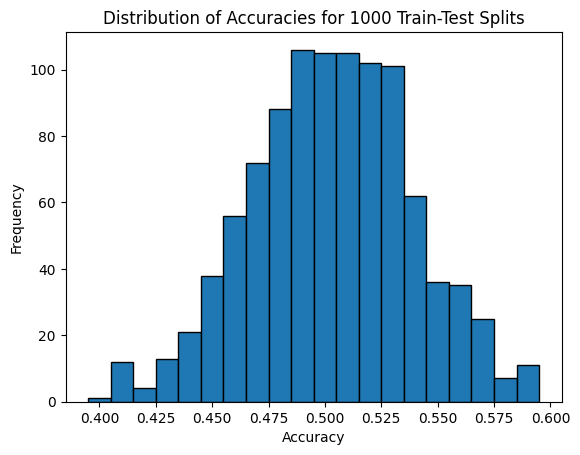

In [10]:
accuracies = []

for seed_value in range(1000):
    random_numbers = seed_maker(seed_value)

    # Perform train-test split on the random numbers
    random_numbers_train, random_numbers_test = train_test_split(
        random_numbers, test_size=0.2, random_state=42
    )

    # generating random numbers for train and test datasets
    labels_train = np.random.choice([0, 1], size=len(random_numbers_train))
    labels_test = np.random.choice([0, 1], size=len(random_numbers_test))

    # reshape to have a single feature per sample
    random_numbers_train = random_numbers_train.reshape(-1, 1)
    random_numbers_test = random_numbers_test.reshape(-1, 1)

    # cretes and stores the model 
    knn_classifier = KNeighborsClassifier(n_neighbors=3)
    knn_classifier.fit(random_numbers_train, labels_train)

    # uses test data to make predictions
    predictions = knn_classifier.predict(random_numbers_test)

    accuracy = metrics.accuracy_score(labels_test, predictions)
    accuracies.append(accuracy)

plt.hist(accuracies, bins=20, edgecolor='black')
plt.title('Distribution of Accuracies for 1000 Train-Test Splits')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()


<font color = lightcoral> \<Write your answer here\></font>
Most of the accuracies are in the 50% area. It is also noticable that accuracies over 60% or under 40% are very unusual. 

------

One really common evaluation metric is <font color = lightcoral>the area under the receiver operating characteristic (AUROC, AUC or AUC-ROC)</font>.  It provides a measure of a model's ability to distinguish between classes, especially in binary classification tasks between the <i>positive class</i> and the <i>negative class</i>. (There sure are multiclass and multilabel cases too, but they are out of scope here.) 

In our case, individuals who have a CVD form the positive class. As the name of the measure suggests, it combines two keys aspects to interpret a model's performance: ROC curves are about the trade-off between the true positive rate and the false positive rate, the former representing the model's ability to correctly identify individuals with a CVD (true positives) and the latter measuring the model's tendency to incorrectly classify individuals without a CVD as if they have the disease (false positives). Thus, the area beneath the curve is simply the AUROC, a single numerical value, that summarizes the overall performance.

**Exercise 1 F)** 

Evaluate the performance of the trained k-NN model by computing the AUROC and plotting the related curve. Draw also the line for random guesses.

- How well does the k-NN model perform in distinguishing between healthy individuals and those with a CVD?

*Tip: You should not use the predicted labels in this exercise.*

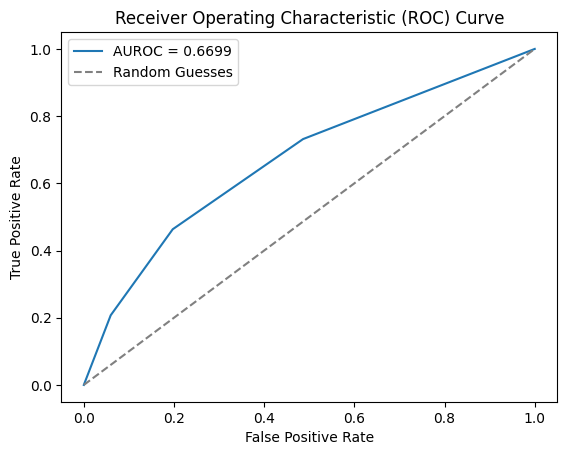

In [11]:
features_train, features_test, labels_train, labels_test = train_test_split(
    scaler.fit_transform(features), labels, test_size=0.2, random_state=42
)

# Initialize and train a k-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(features_train, labels_train)

# Make predictions on the test set
predictions = knn_classifier.predict_proba(features_test)[:, 1]

# Calculate the AUROC
fpr, tpr, thresholds = metrics.roc_curve(labels_test, predictions)
auroc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUROC = {auroc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guesses')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

<font color = lightcoral> \<Write your answer here\></font>

It distinguishes the true data with a probapility of 67 % 

__________
## <font color = royalblue> 2. Classification accuracy using leave-one-out cross-validation

While the train-test split may provide us with an unbiased estimate of the performance, we only evaluate the model once. Especially when dealing with small datasets, a test set itself will be very small. How can we be sure that the evaluation is accurate with this small test set and not just a good (or bad) luck? And what if we'd like to compare two models and the other seems to be better -- how can we be sure that it's not just a coincidence?

Well, there's a great help available and it's called <font color = royalblue>cross-validation</font>. With its help, we can split the dataset into multiple different training and test sets, which allows us to evaluate models across various data partitions. This time, we'll take a closer look at the <font color = royalblue>leave-one-out cross-validation</font>.

**Exercise 2**

Let's keep the focus on detecting the CVD, so once again we utilize the k-NN model (with $k=3$) to predict the precense of the disease. Now, apply leave-one-out cross-validation to assess whether the k-NN model is suitable for addressing the problem. You may use the entire dataset on this task.

- What can you say about the accuracy compared to the previous task?
- What do you think: Does the k-NN model work for the problem in hand? Explain your answer.

*Tip: This sure can be done manually, but `cross_val_score` is quite a handy function too.*

In [12]:
### Code - Leave-one-out cross-validation
X = cardio_data.drop('cardio', axis=1)
Y = cardio_data['cardio']

knn = KNeighborsClassifier(n_neighbors=3)

loo = LeaveOneOut()
# uses the previous scaler to standardize data
acc_scores = cross_val_score(knn, scaler.fit_transform(X), Y, cv=loo, scoring='accuracy')
acc_scores.mean()


0.6783333333333333

<font color = royalblue> \<Write your answer here\></font>
The accuracy is a bit lower here. (70% -> 68%)

It works well. K-NN is sensitive to the scale of features but we standardized the set so its good practice. The data is not big enough for the algorithm so I think it handles it quite well.

____________
## <font color = forestgreen> 3. Model selection with leave-one-out cross-validation

So far, we've trained one model at a time and I've given the value of k for you. Accuracy is what it is (no spoilers here), but could we still do a little better? Let's explore that possibility through a process known as <font color=green>hyperparameter tuning</font>. The cross-validation is especially important tool for this task. Note here, that model selection and model evaluation (or assessment) are two different things: We use model selection to estimate the performance of various models to identify the model which is most likely to provide the "best" predictive performance for the task. And when we have found this most suitable model, we *assess* its perfomance and generalisation power on unseen data.

This time, we're going to train multiple models, let's say 30, and our goal is to select the best K-Nearest Neighbors model from this set. Most models come with various hyperparameters that require careful selection, and the k-NN model is no exception. Although we're talking about the number of neighbors here, it's important to note that k-NN also has several other hyperparameters. However, for the sake of simplicity, this time we'll focus solely on fine-tuning the number of nearest neighbors, that is, the value of k. 

Let's focus on the model selection part here for the sake of comprehending the cross-validation itself. We'll get later on the whole pipeline, which also includes model assessment.

**Exercise 3**

Find the optimal k value from a set of $k=1...30$ using leave-one-out cross-validation. Plot the accuracies vs. the k values. Again, you may use the entire dataset.

- Which value of k produces the best accuracy when using leave-one-out cross-validation? Compare the result to the previous model with $k=3$.
- If the number of k is still increased, what is the limit that the accuracy approaches? Why?
- Discuss the impact of choosing a very small or very large number of neighbors on the k-NN model's ability to distinguish between the healthy individuals and the ones with CVD.

In [13]:
### Code - Select best model
X = cardio_data.drop('cardio', axis=1)
Y = cardio_data['cardio']
stanX = scaler.fit_transform(X)

knn_frame = pd.DataFrame(columns=['acc', 'k'])
loo = LeaveOneOut()
for i in range(1,31):
    # going through every k in 1...30
    knn = KNeighborsClassifier(n_neighbors=i)
    
    
    acc_scores = cross_val_score(knn, stanX, Y, cv=loo, scoring='accuracy')
    temp = pd.DataFrame({'acc': [acc_scores.mean()], 'k': [i]})
    # concatenating it into a dataframe. Not mandatory just made a choice to do it like this
    knn_frame = pd.concat([knn_frame, temp], ignore_index=True)
    

In [14]:
Y.value_counts()[0] / len(Y)

0.7

Text(0, 0.5, 'Accuracy')

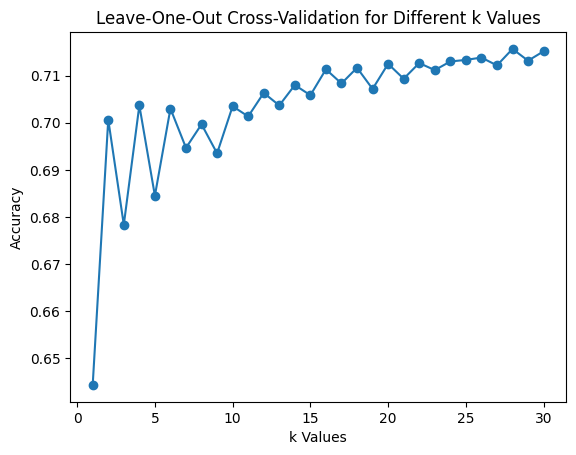

In [15]:
### Code - Plot the accuracies vs. the values for k
plt.plot(knn_frame.k, knn_frame.acc, marker='o')
plt.title('Leave-One-Out Cross-Validation for Different k Values')
plt.xlabel('k Values')
plt.ylabel('Accuracy')

In [16]:
print(knn_frame[knn_frame['acc'] == knn_frame['acc'].max()])
print(knn_frame[knn_frame['k'] == 3])

         acc   k
27  0.715667  28
        acc  k
2  0.678333  3


<font color = green>\<Write your answer here\></font>

Which value of k produces the best accuracy when using leave-one-out cross-validation? Compare the result to the previous model with k=3.

K = 28 has the highest accuracy, its about 0.04 -> 4% higher than the k=3 value.

If the number of k is still increased, what is the limit that the accuracy approaches? Why?

I would guess that the accuracy would approach the value that is the proportion of the major value in the dataset. In our case we have 4200 zeros and 1800 ones, so I would think it will approach 0,7.

Discuss the impact of choosing a very small or very large number of neighbors on the k-NN model's ability to distinguish between the healthy individuals and the ones with CVD.

Small k:

More sensitive to noise.
There is a fear of overfitting, where the model memorizes the training data rather than learns a general pattern. So the model would perform badly with new unseen data. Small k values might result in misclassification, especially if there are regions in the feature space with mixed or overlapping classes.

Large k:

Smoother.
The model is more general and ignores local patterns that maybe important.

________________
## <font color = red>  4. Training and testing on the same dataset </font>

<i>Note that this should never be done outside of this exercise! You have been warned.</i>

Oh, but what if we just trained a model using the *entire* dataset? Wouldn't we like to use as much data as possible to discover the underlying patterns in the data so why not to use all of it?

**Exercise 4**

This is quite straightforward: Train 30 k-NN models ($k = 1...30$ ) using the whole dataset and evaluate the trained models using, again, the whole dataset. Create a plot that displays the accuracies against the corresponding k values. Include the accuracy values from the previous task in the same figure.

- What's the optimal value for k now and why's that? How would you interpret the reliability of the predictions?
- Explain why you should never use the same dataset for training and testing.

In [17]:
### Code - Train with whole data
# X, stanX and Y are the same as in the 3rd excercise

#knn_frame = pd.DataFrame(columns=['acc', 'k'])
accurcies = []
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(stanX,Y)
    Y_pred = knn.predict(stanX)
    acc4 = metrics.accuracy_score(Y,Y_pred)
    accurcies.append(acc4)


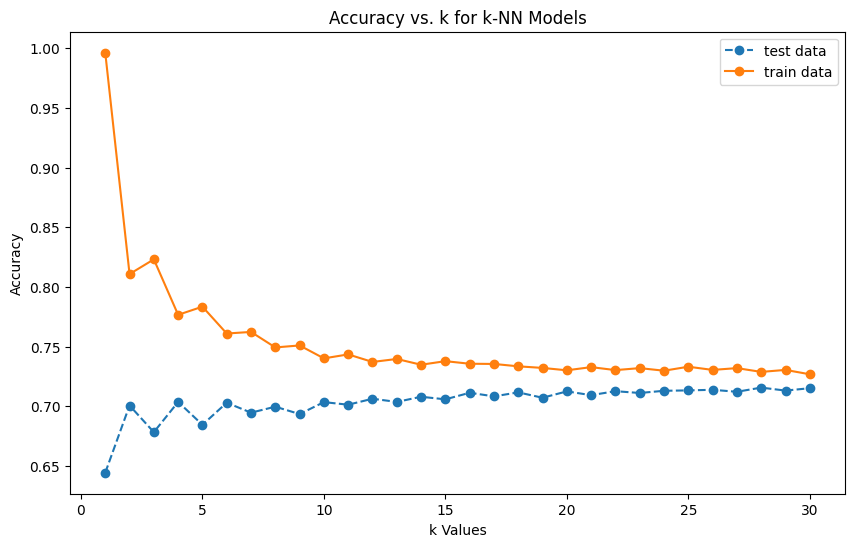

In [18]:
### Code - Plot results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), knn_frame.acc, label='test data', marker='o', linestyle='--')

# Plot accuracies from training on the entire dataset
plt.plot(range(1,31), accurcies, label='train data', marker='o')

plt.title('Accuracy vs. k for k-NN Models')
plt.xlabel('k Values')
plt.ylabel('Accuracy')
plt.legend()

<font color = red>\<Write your answer here\></font>

What's the optimal value for k now and why's that? How would you interpret the reliability of the predictions?

If we use the same data to test and train and the k is 1 we should have an accuracy of 100%. But for the test data we can see that k=1 isn't that accurate. We should use the k value where we can see the plots start to straigthen. So maybe in the 23 area. Though when I googled about this I got the answer of k=$\sqrt{n}$ where n is the number of data instances (https://stackoverflow.com/questions/11568897/value-of-k-in-k-nearest-neighbor-algorithm). Which would be 77 in our case. I would still use 20-25 just because 77 sounds quite high.

Explain why you should never use the same dataset for training and testing.

Using the same data with k=1 should give you the accurcy of 100%. It's more about memorizing the previous data, not about learning the data. There is no telling that this model would work with other data so it's not advisable.

_____________________

## <font color = darkorange> 5. Comparison of ridge regression and k-NN regression </font>

The previous exercises were about classification. Now, we are ready to see another kind of supervised learning - regression - as we are changing our main goal from predicting discrete classes (healty/sick) to estimating continuous values. The following exercises are going to involve utilizing two different regression models, <font color = darkorange>Ridge Regression</font> and <font color = darkorange>K-Nearest Neighbors (k-NN) Regression</font>, and our goal is to evaluate and compare the performances of these two models. 

Let's change the dataset to make the following exercises more intuitive. The new dataset is about brushtail possums and it includes variables such as

- <b>sex</b>: Gender, either male (0) or female (1)
- <b>age</b>: Age in years
- <b>len_head</b>: Head length in cm
- <b>width_skull</b>: Skull width in mm
- <b>len_total</b>: Total length in cm
- <b>len_tail</b>: Tail length in cm
- <b>len_foot</b>: Foot length 
- <b>len_earconch</b>: Ear conch length 
- <b>width_eye</b>: Distance from medial canthus to lateral canthus of right eye, i.e., eye width
- <b>chest</b>: Chest grit in cm
- <b>belly</b>: Belly grit in cm

In this case, our target variable will be *the age of the possum*. The data for this exercise has been modified from the original source.

There's the code chunk for loading data provided again. <font color = red>Again, the data file should be located in the same directory as this notebook file!</font>

In [19]:
### Loading code provided
# ------------------------------------------------------
# The data file should be at the same location than the 
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------

# Data path
data_path = 'ex2_possum_data.csv'

# Load the data 
possum_data = pd.read_csv(data_path)

-----------

Regression allows us to examine <font color = darkorange>relationships between two or more variables</font>. This relationship is represented by an *equation*, which itself represents how a change in one variable affects another on average. For example, we could examine how a change in possum's total length affects, on average, its estimated age.

We start by examing those relationships between the variables in the given dataset.


**Exercise 5 A)**

Plot pairwise relationships between the age variable and the others where you color the samples based on the sex variable. 

- Which body dimensions seem to be most correlated with age? And are there any variables that seem to have no correlation with it?
- Are there any differences in the correlations between males and females?

*Tip: `seaborn.pairplot()` is handy with the parameters `(x,y)_vars` and `hue`. You actually can fit a linear model to draw a regression line with the parameter `kind` set to `"reg"`.*

In [20]:
### changed the possums skull width from mm to cm
possum_data.width_skull = possum_data['width_skull']/10
possum_data

,sex,age,len_head,width_skull,len_earconch,width_eye,len_foot,len_tail,chest,belly,len_total
0,0,8.0,94.1,6.04,54.5,15.2,74.5,36.0,28.0,36.0,89.0
1,1,6.0,92.5,5.76,51.2,16.0,72.5,36.5,28.5,33.0,91.5
2,1,6.0,94.0,6.00,51.9,15.5,75.4,39.0,30.0,34.0,95.5
3,1,6.0,93.2,5.71,52.2,15.2,76.1,38.0,28.0,34.0,92.0
4,1,2.0,91.5,5.63,53.2,15.1,71.0,36.0,28.5,33.0,85.5
...,...,...,...,...,...,...,...,...,...,...,...
96,0,1.0,89.5,5.60,46.8,14.8,66.0,36.5,23.0,27.0,81.5
97,0,1.0,88.6,5.47,48.0,14.0,64.4,39.0,25.0,33.0,82.5
98,1,6.0,92.4,5.50,45.4,13.0,63.5,38.0,25.0,30.0,89.0
99,0,4.0,91.5,5.52,45.9,15.4,62.9,36.5,25.0,29.0,82.5


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Pair Plot of first four variables against age')

<Figure size 1600x800 with 0 Axes>

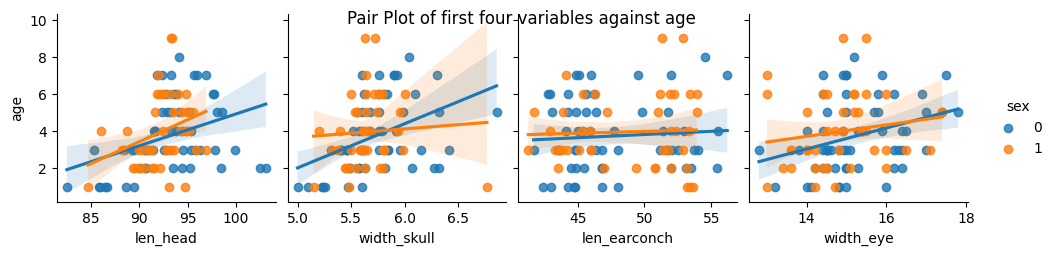

In [21]:
# I made two plots because the data was to little on my screen when printed next to each other
plt.figure(figsize=(16, 8))
# Plot pairwise relationships with 'sex' as the hue
sns.pairplot(possum_data, hue='sex', y_vars=['age'], x_vars=['len_head', 'width_skull', 'len_earconch', 'width_eye'], kind='reg')
plt.suptitle("Pair Plot of first four variables against age")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Pair Plot of second five variables against age')

<Figure size 1600x800 with 0 Axes>

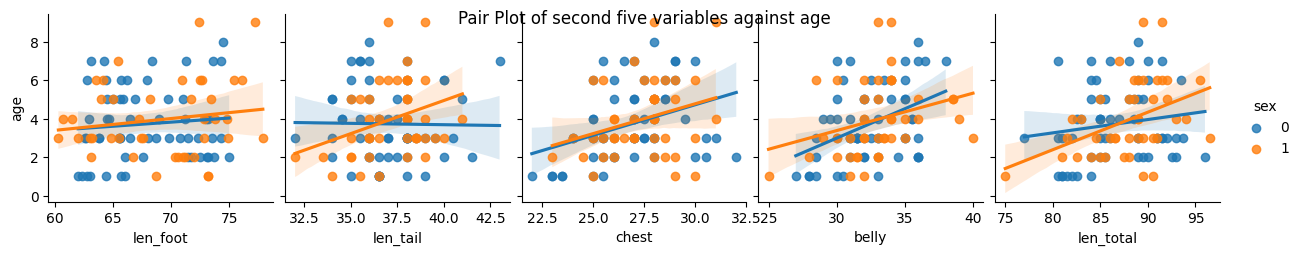

In [22]:
plt.figure(figsize=(16, 8))
# Plot pairwise relationships with 'sex' as the hue
sns.pairplot(possum_data, hue='sex', y_vars=['age'], x_vars=['len_foot', 'len_tail', 'chest', 'belly', 'len_total'], kind='reg')
plt.suptitle("Pair Plot of second five variables against age")

<font color = darkorange>\<Write your answer here\>

Which body dimensions seem to be most correlated with age? And are there any variables that seem to have no correlation with it?

The data isn't that correlated if you just watch the plotting, but some like len_total, chest, len_head and width_skull are in my oppinion more correlated than others.

Are there any differences in the correlations between males and females?

There are some differences for example len_tail seem to be positively correlated for females and negatively for males. Width_skull is more positively correlated for males than females.

------

Before the regression analysis itself, let's check that our dataset is in a proper format. We'll also perform the train-test split as we're going to first tune the hyperparameters for each model using the training set and test the overall performance of the chosen models using the test set.

**Exercise 5 B)**

Do you need to prepare the data a little? Explain your decision. Perform the train-test (80/20) split. 

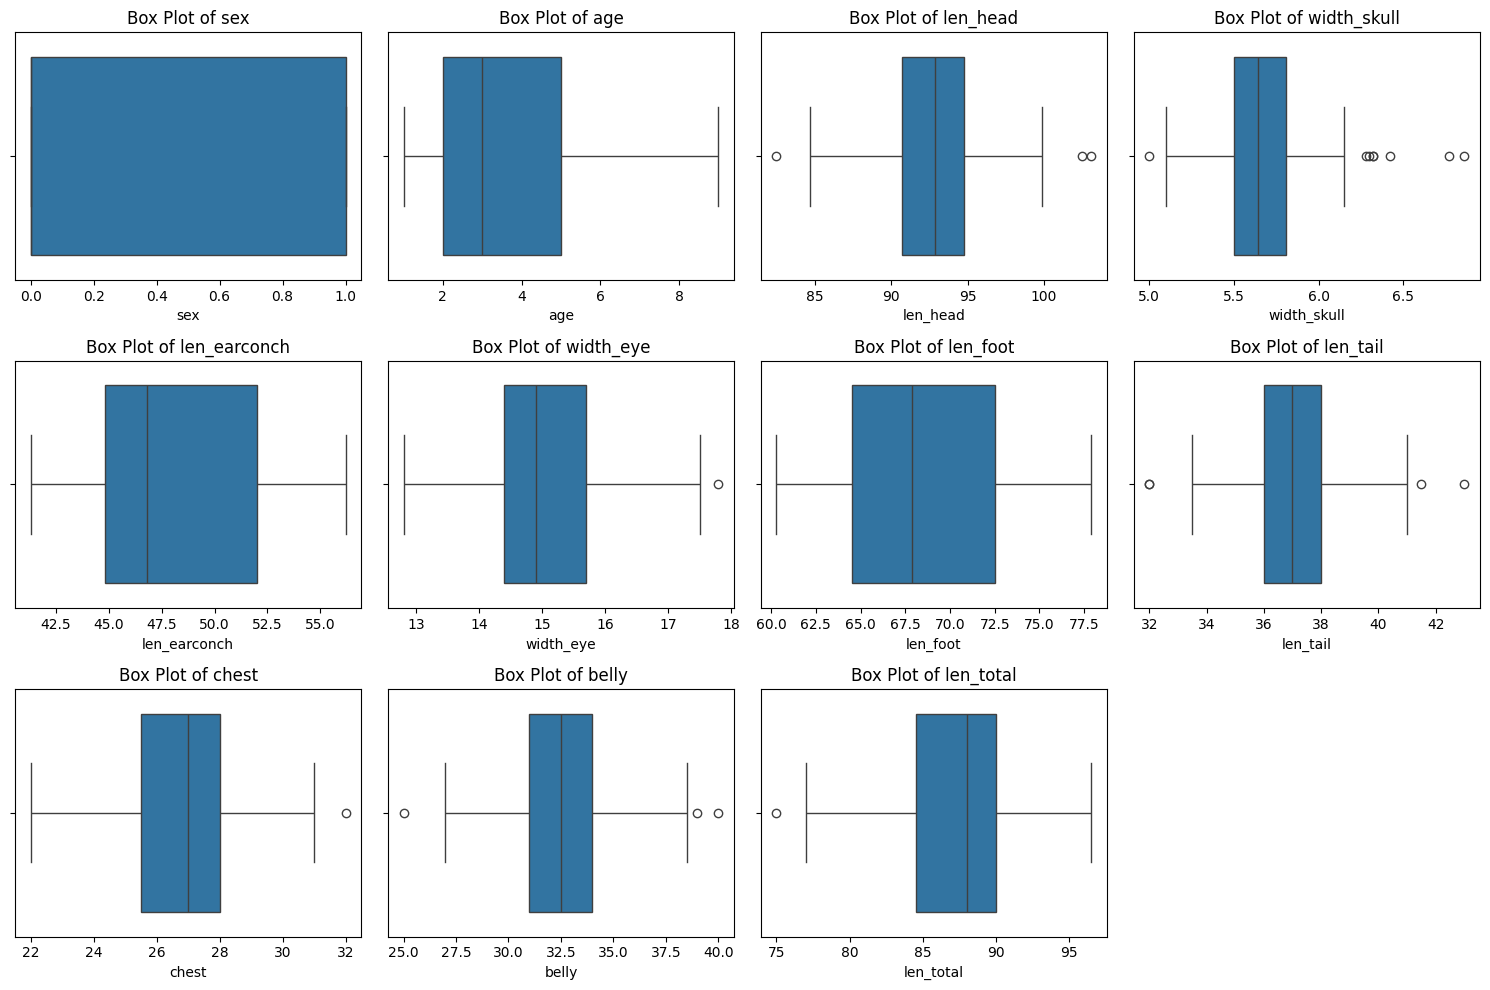

Indices of outliers: Index([16, 50, 94], dtype='int64')


In [23]:
plt.figure(figsize=(15, 10))

# Box plots for each variable just to see the outliers, again not mandatory
for column in possum_data.columns:
    plt.subplot(3, 4, possum_data.columns.get_loc(column) + 1)  # Adjust the subplot grid if needed
    sns.boxplot(x=possum_data[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()
# Z-score for each variable using NumPy
mean = np.mean(possum_data, axis=0)
std = np.std(possum_data, axis=0)
z_scores = (possum_data - mean) / std

# Identify outliers using Z-score
outliers = (z_scores > 3) | (z_scores < -3)

# Display the indices of the outliers
outliers_indices = possum_data.index[outliers.any(axis=1)]
print("Indices of outliers:", outliers_indices)

In [24]:
### Code - Data preparation
prep_data = possum_data.drop([16,50,94])
possum_X = prep_data.drop(['age'], axis=1)  # Features excluding 'age'
possum_y = prep_data['age']  # Target variable 'age'

# Perform the train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(scaler.fit_transform(possum_X), possum_y, test_size=0.2, random_state=42)

print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (78, 10) (78,)
Test set: (20, 10) (20,)


<font color = darkorange>\<Write your answer here\></font>

I dropped the rows 16, 50 and 94 because they had some outliers. 

------

Regarding the k-NN, we have already get familiar with the optimization of the k value. The idea behind the k-NN is the same as previously in classification, the output isn't a class anymore but a continuous value. So, for now, we can stick to the optimal k value. However, for Ridge Regression, we'll focus on the hyperparameter called $\lambda$ (read as 'lambda'), the regularization term (or penalty term or L2 penalty, how ever we'd like to call it), and try to find its optimal value for this task. After the model selection for both regression is performed, we compare the chosen models using a metric called <font color = darkorange>mean absolute error (MAE)</font>.

**Exercise 5 C)**

Train multiple ridge regression models and k-NN regression models. For hyperparameters, use $\lambda=2^{-10}...2^{10}$ and $k=1...30$. Once again, use leave-one-out cross validation. Remember to use only the training dataset for model selection. Plot the optimal k values and lambdas versus corresponding MAEs (two different plots).

- Introduce the optimal hyperparameters for each regression model.
- How do you interpret the MAE in our case when the target variable is age?

*Note: In a `sklearn.linear_model.Ridge` class, lambda is called as "alpha" so don't get confused.*

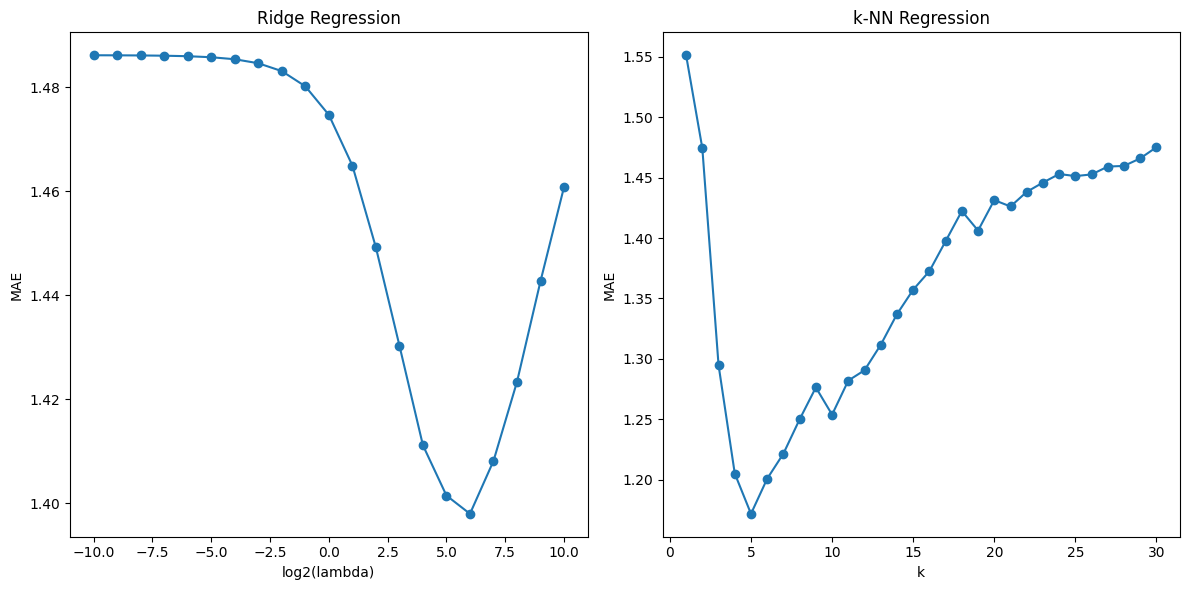

In [25]:
### Code - CV for Ridge regression and k-NN regression

# Hyperparameter ranges
ridge_alphas = 2.0 ** np.arange(-10, 11)
k_values = np.arange(1, 31)

# Function for custom scorer (MAE)
mae_scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=False)

# Lists to store results
ridge_mae_values = []
knn_mae_values = []
ridge_optimal_alphas = []
knn_optimal_ks = []
loO = LeaveOneOut()
# Ridge regression with cross-validation
for alpha in ridge_alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_mae = -np.mean(cross_val_score(ridge_model, X_train, y_train, cv=loO, scoring=mae_scorer))
   
    ridge_mae_values.append(ridge_mae)
    ridge_optimal_alphas.append(alpha)

# k-NN regression with cross-validation
for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_mae = -np.mean(cross_val_score(knn_model, X_train, y_train, cv=loO, scoring=mae_scorer))
 
    knn_mae_values.append(knn_mae)
    knn_optimal_ks.append(k)

# Plotting
plt.figure(figsize=(12, 6))

# Ridge regression plot
plt.subplot(1, 2, 1)
plt.plot(np.log2(ridge_optimal_alphas), ridge_mae_values, marker='o')
plt.title('Ridge Regression')
plt.xlabel('log2(lambda)')
plt.ylabel('MAE')

# k-NN regression plot
plt.subplot(1, 2, 2)
plt.plot(knn_optimal_ks, knn_mae_values, marker='o')
plt.title('k-NN Regression')
plt.xlabel('k')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()


In [26]:
# Find the optimal hyperparameters for Ridge Regression
optimal_ridge_alpha = ridge_alphas[np.argmin(ridge_mae_values)]
mean_ridge_mae = np.mean(ridge_mae_values)

# Find the optimal hyperparameters for k-NN Regression
optimal_knn_k = k_values[np.argmin(knn_mae_values)]
mean_knn_mae = np.mean(knn_mae_values)

# Print the results
print("Optimal Ridge Regression hyperparameters:")
print(f"Lambda: {optimal_ridge_alpha}")
print(f"Lambda MAE: {mean_ridge_mae}")
print("\nOptimal k-NN Regression hyperparameters:")
print(f"Number of Neighbors (k): {optimal_knn_k}")
print(f"k-NN MAE: {mean_knn_mae}")


Optimal Ridge Regression hyperparameters:
Lambda: 64.0
Lambda MAE: 1.4578295629733093

Optimal k-NN Regression hyperparameters:
Number of Neighbors (k): 5
k-NN MAE: 1.3678644577294266


<font color = darkorange>\<Write your answer here\></font>

- Introduce the optimal hyperparameters for each regression model.

Optimal $\lambda=2^6$ which is 64, nd optimal K = 5

- How do you interpret the MAE in our case when the target variable is age?

That the predicted ages are on average within 1.37 nd 1.46 years from the true ages.

------

The cross-validation was employed for model selection and at this point, we have the optimal hyperparameter settings for each model. Let's finally assess both models using the test set. To continue from this, we first fit the chosen models using the entire training, ensuring that the models are trained with the maximum available data. 

**Exercise 5 D)**

Fit the chosen models with the whole training set. Evaluate the models using the test set and describe the results.

- How well did the models perform in estimating the possums' ages?
- So, what's the pitfall in here if you had compared the overall performance of the models based on the cross-validation MAEs and not the MAEs for the test set?

In [27]:
## Code - Evaluating the selected models


#'X_train', 'y_train', 'X_test', 'y_test' were defined earlier

# Ridge Regression
ridge_model = Ridge(alpha=optimal_ridge_alpha)  # Use the optimal alpha from your hyperparameter tuning
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

# Evaluate Ridge Regression
ridge_mae = metrics.mean_absolute_error(y_test, ridge_predictions)
ridge_mse = metrics.mean_squared_error(y_test, ridge_predictions)
ridge_r2 = metrics.r2_score(y_test, ridge_predictions)

# k-NN Regression
knn_model = KNeighborsRegressor(n_neighbors=optimal_knn_k)  # Use the optimal k from your hyperparameter tuning
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Evaluate k-NN Regression
knn_mae = metrics.mean_absolute_error(y_test, knn_predictions)
knn_mse = metrics.mean_squared_error(y_test, knn_predictions)
knn_r2 = metrics.r2_score(y_test, knn_predictions)

# Print or log the results
print("Ridge Regression Results:")
print(f"MAE: {ridge_mae}")
print(f"MSE: {ridge_mse}")
print(f"R-squared: {ridge_r2}")

print("\nk-NN Regression Results:")
print(f"MAE: {knn_mae}")
print(f"MSE: {knn_mse}")
print(f"R-squared: {knn_r2}")


Ridge Regression Results:
MAE: 1.6983690565601406
MSE: 4.3580742153549075
R-squared: 0.12838515692901853

k-NN Regression Results:
MAE: 1.6
MSE: 3.6480000000000006
R-squared: 0.2704


<font color = darkorange>\<Write your answer here\></font>

On average, the Ridge Regression model's predictions are approximately 1.698 units away from the true age of the possums.
As for the k-NN predicted it 1.6 units away. K-NN seems to be better here.

Overfitting:

If we only evaluate on a single test set (as in the test set MAE), there's a risk that the model might have learned patterns specific to that particular test set, leading to overestimated performance.

Relying on cross-validation MAEs provides a more robust and generalizable estimate of model performance compared to using MAEs for a single test set. Cross-validation helps to address issues related to overfitting, variability in test set performance, and the impact of specific data splits. It is a widely used practice in machine learning for model evaluation and hyperparameter tuning.

________________
## <font color = slategrey> BONUS: Feature selection - most useful features in predicting cardiovascular diseases </font>

You can stop here and get the "pass" grade! To get the "pass with honors" grade, you need to do the following exercise. This means you'll get one bonus point for the exam.

The exercise is not as straightforward as the previous ones, and may require you to do some research of your own. You are also required to **explain** the steps you choose with your own words, and show that you tried to understand the idea behind the task. There's no single correct solution for this so just explain what you did and WHY you did it.

----------------


Unfortunately, due to the lack of resources and time, doctors can't measure all the values represented in the given cardio dataset. Fortunately, eager students are willing to help: Your task is to identify <font color = slategrey>four [4] most useful features</font> for predicting the presence of the CVD from the dataset. The steps needed for this job are presented above except the feature selection part. You must remember not to leak any information from the test set when selecting the features, i.e., you try to find those five features using only the training set.

Regarding the feature selection itself, you may choose your weapon from the three categories: filter methods, embedded methods or wrapper methods. Use <font color = slategrey>two methods from two different category and compare their outputs</font>. Bonus material about the methods is provided in Moodle.

Evaluate the model of your choice with the limited dataset by examining the confusion matrix and computing the accuracy and the AUROC.

**Discuss** your findings and results.

In [28]:
## Code - Bonus task

<font color = slategrey>\<Write your answer here\></font>